# Importing Libraries

In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Loading the Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"./breast-cancer.csv")

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
data =data.drop(labels=["Unnamed: 32"],axis=1)

# Replacing M with 1 and B with 0

In [10]:
data["diagnosis"] = data["diagnosis"].replace("M",1)

In [11]:
data["diagnosis"] = data["diagnosis"].replace("B",0)

/tmp/ipykernel_64922/844980292.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnosis"] = data["diagnosis"].replace("B",0)


In [12]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# As data is clean lets analyze it

# lets check the ditribution of data

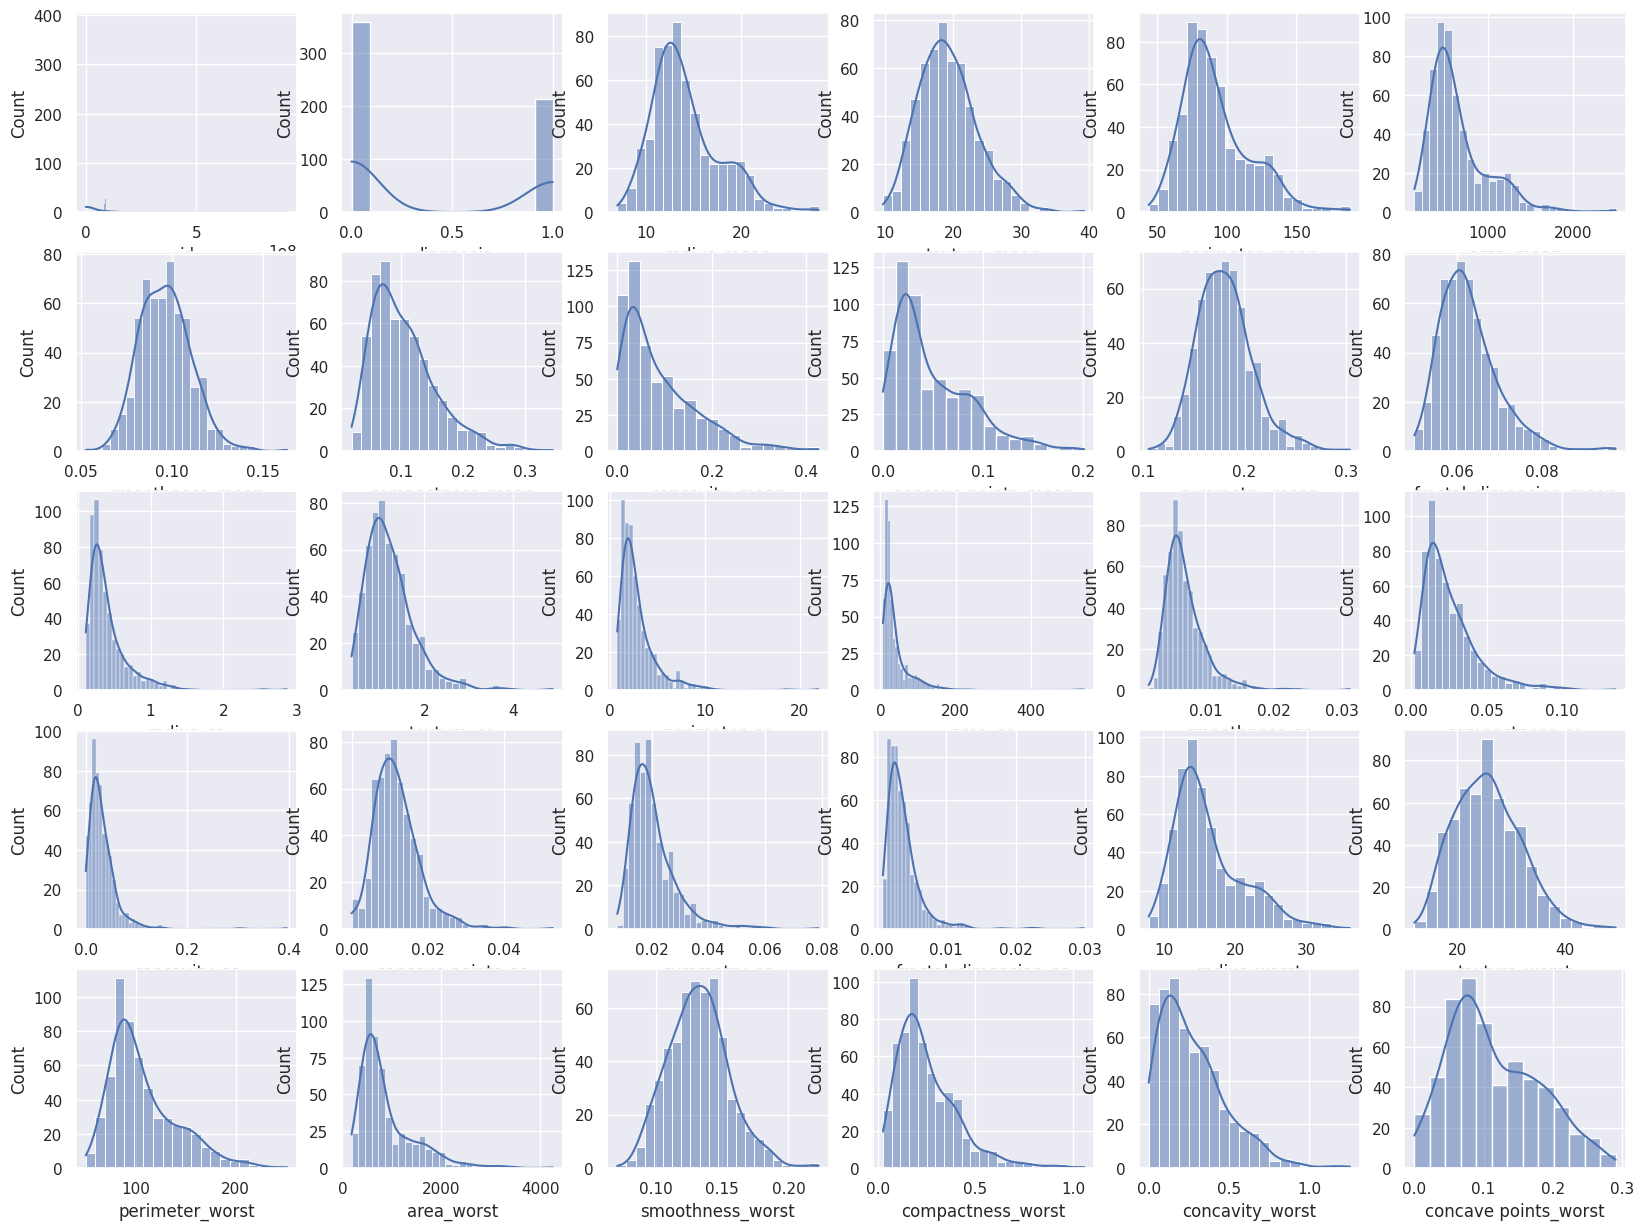

In [13]:
plt.figure(figsize = (20, 15))
sns.set(style="darkgrid")
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
plt.show()

# checking for outliers

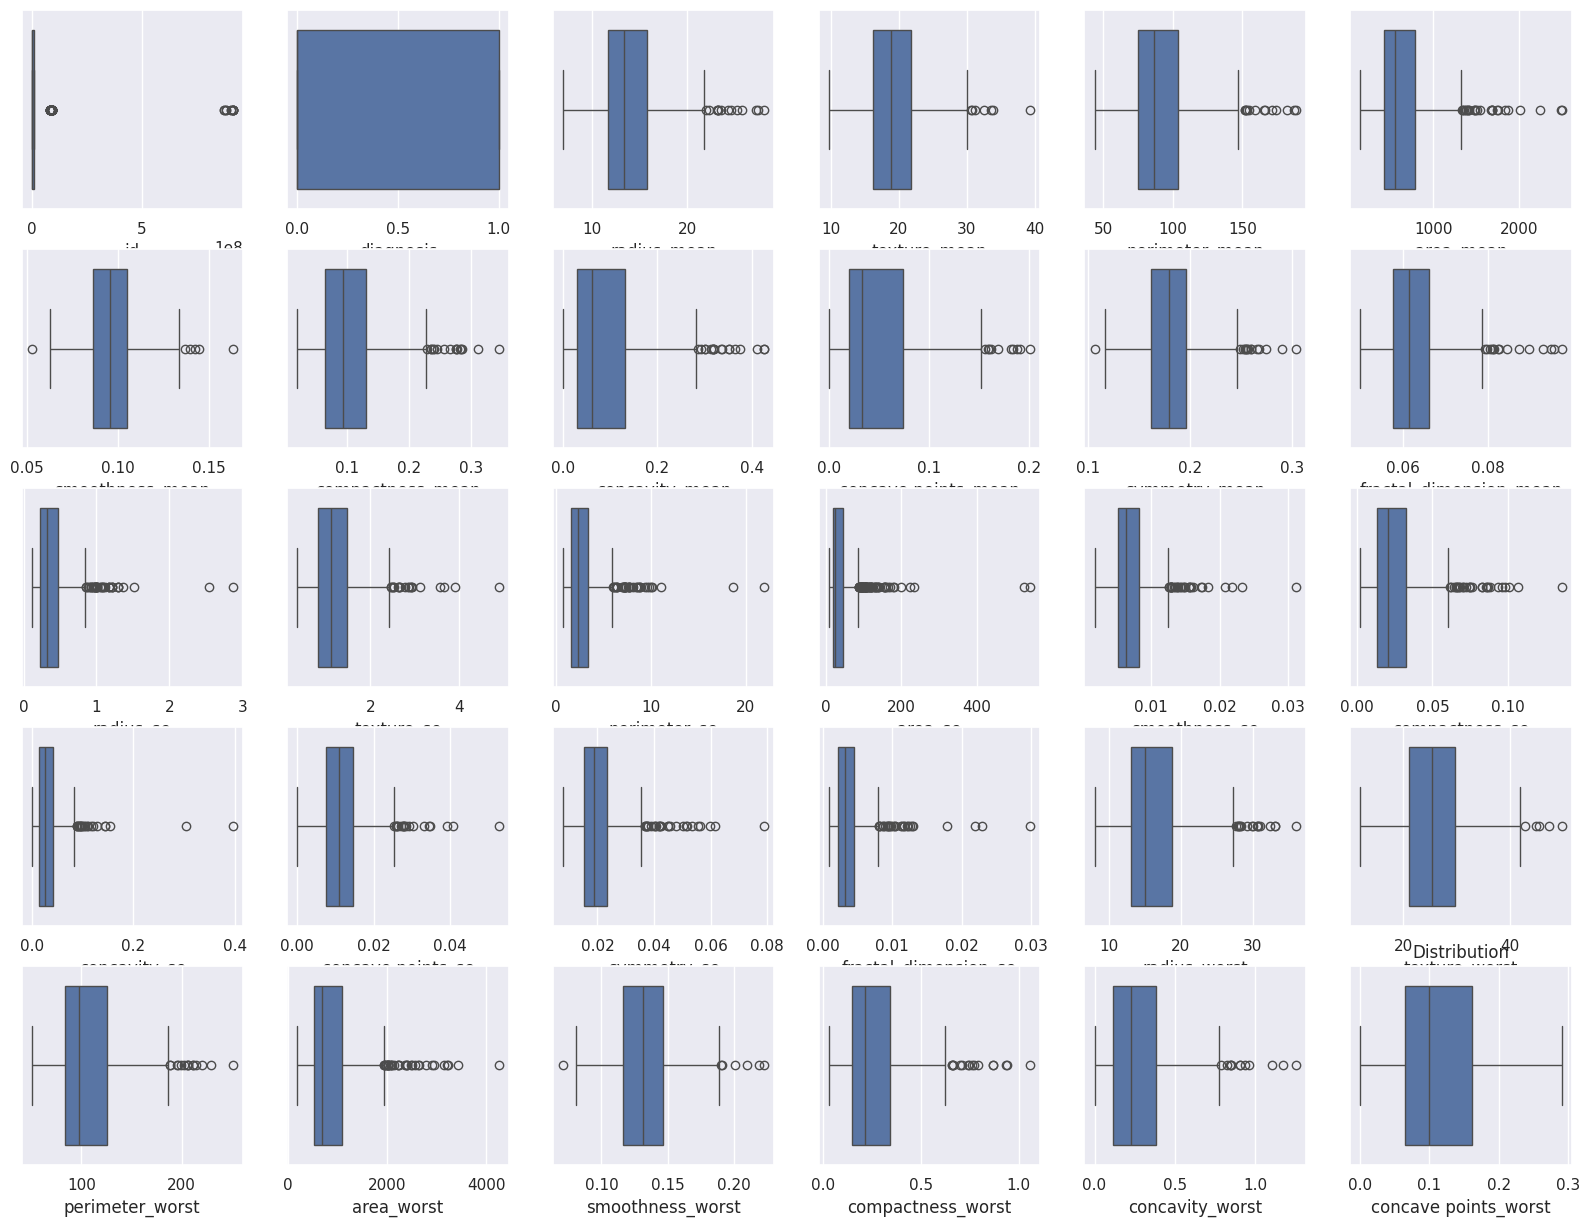

In [14]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column)
       
    plotnumber += 1
plt.title("Distribution")
plt.show()

<Axes: >

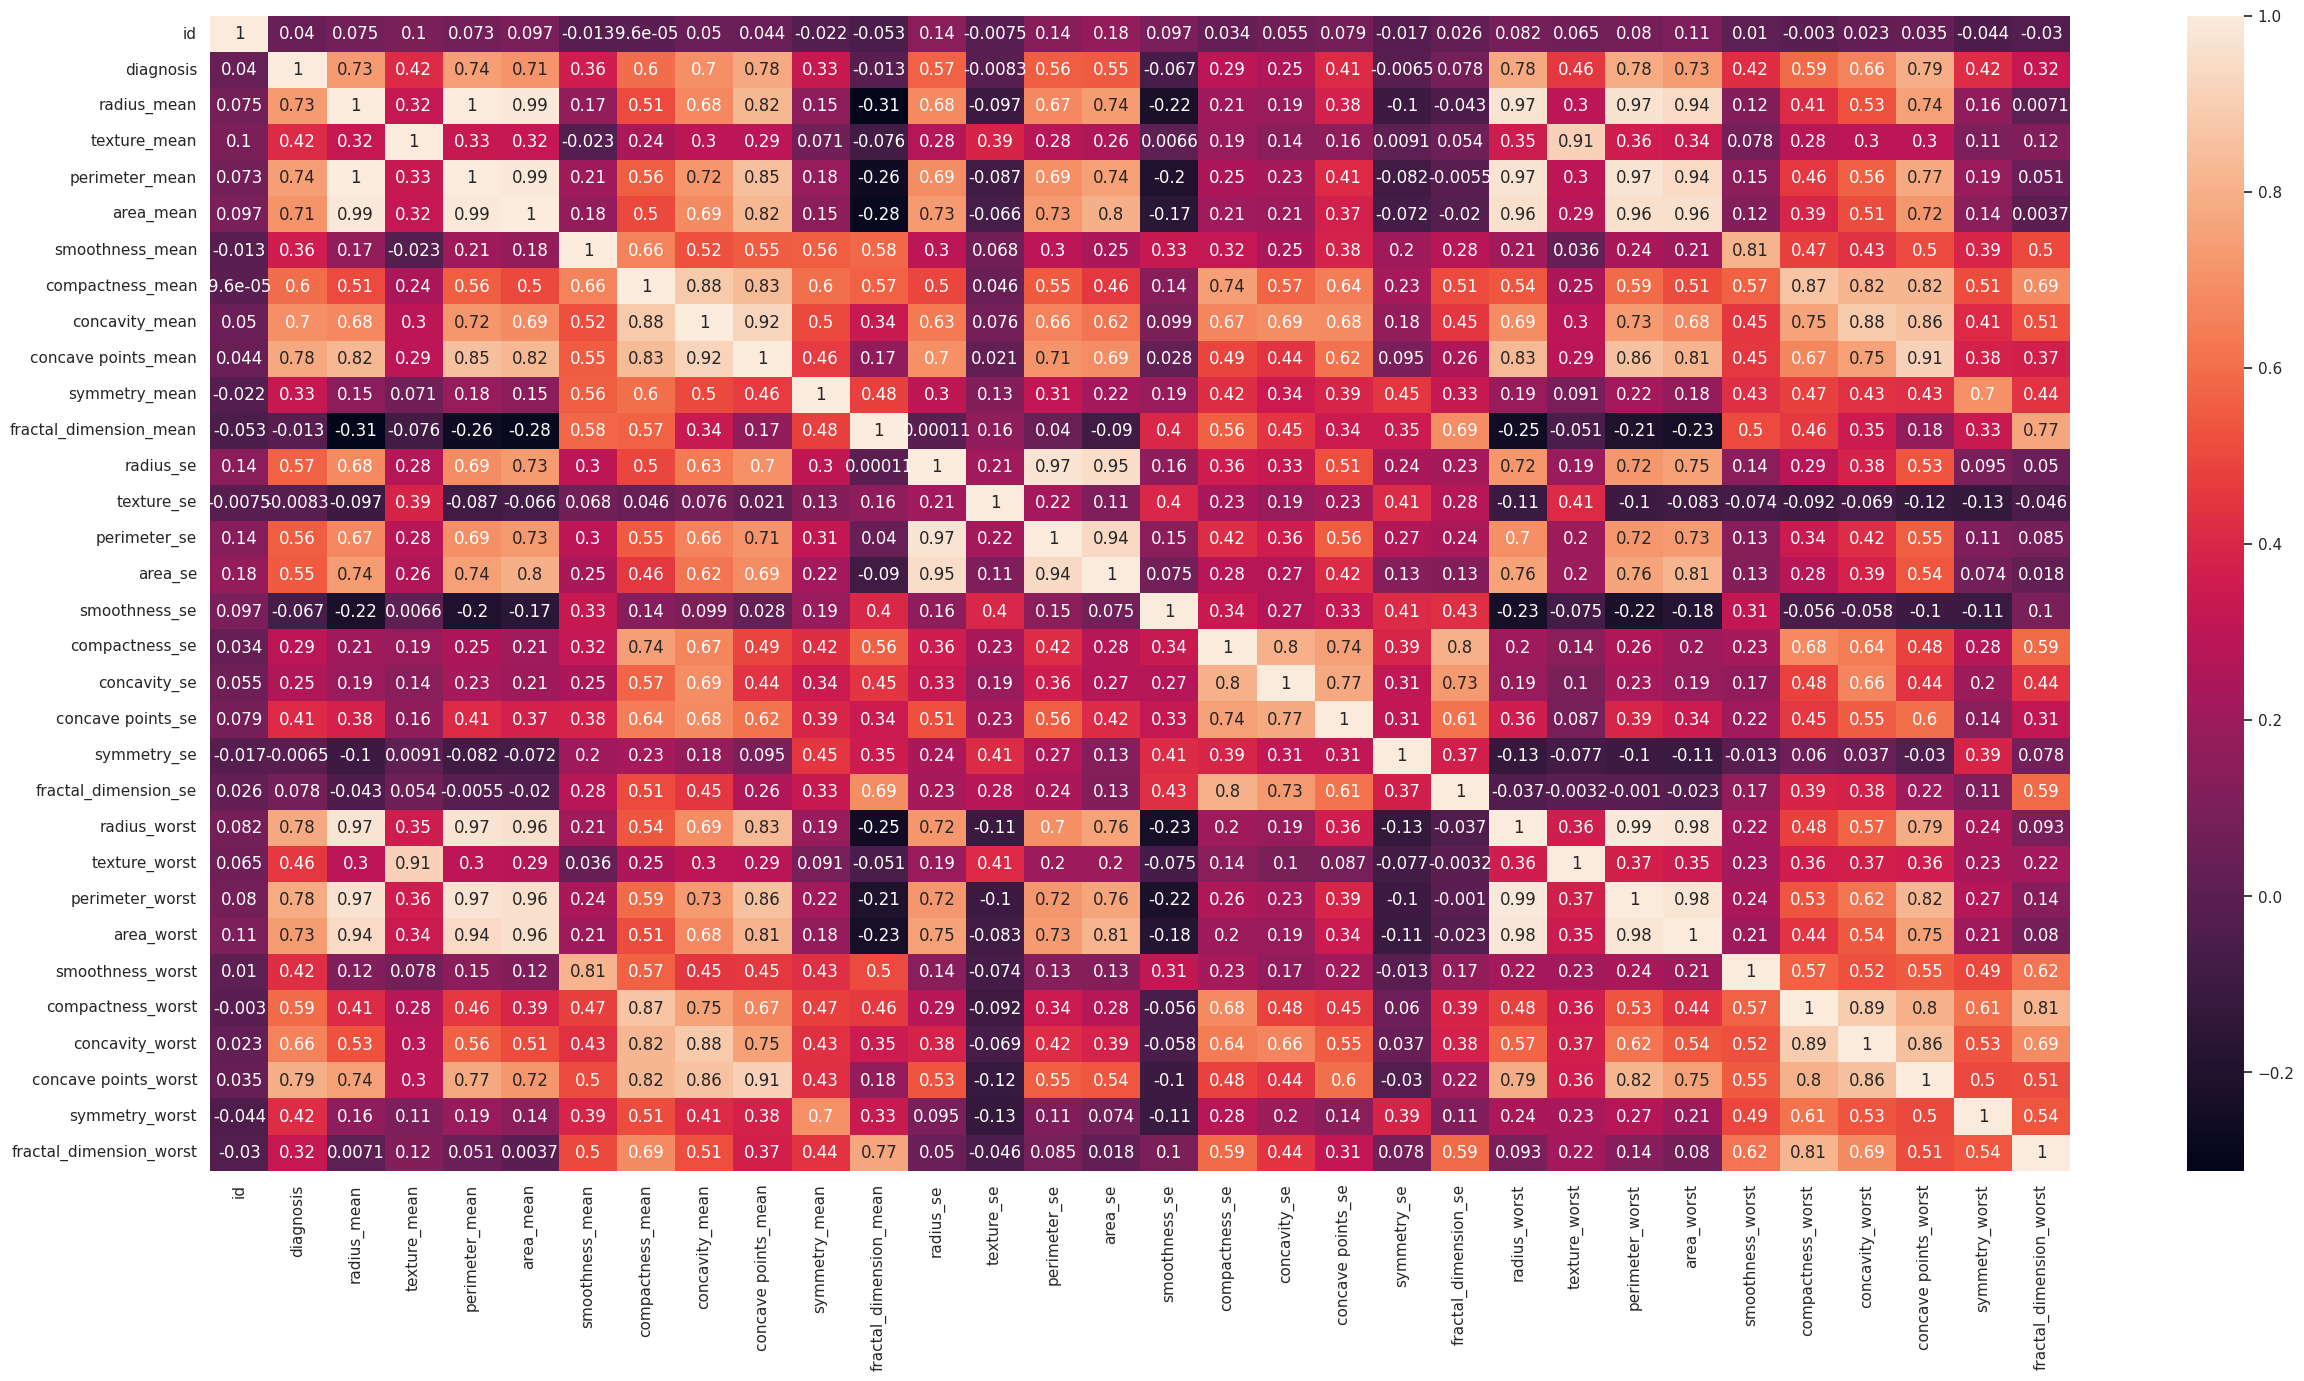

In [15]:
plt.figure(figsize = (30, 15))
sns.heatmap(data.corr(),annot=True)

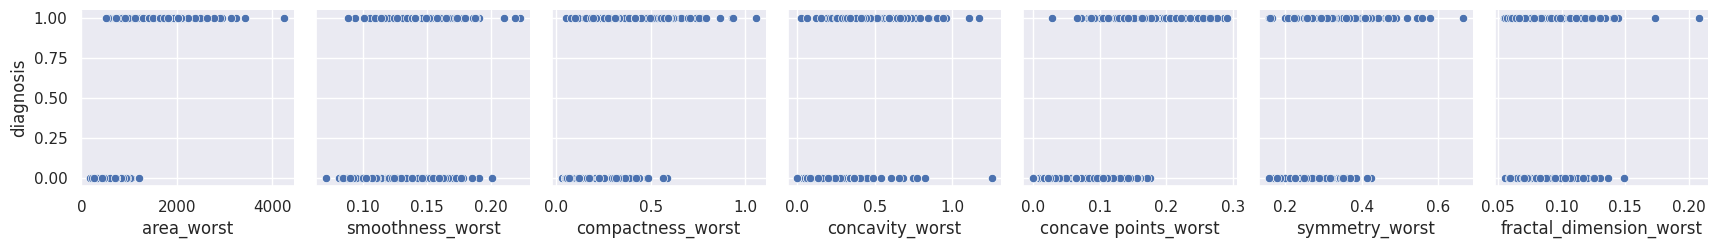

In [16]:
sns.pairplot(data,
             x_vars=[
                          'area_worst',
                     'smoothness_worst',
                  'compactness_worst',
                     'concavity_worst',
                     'concave points_worst',
                        'symmetry_worst',
                      'fractal_dimension_worst'],
             y_vars=["diagnosis"])

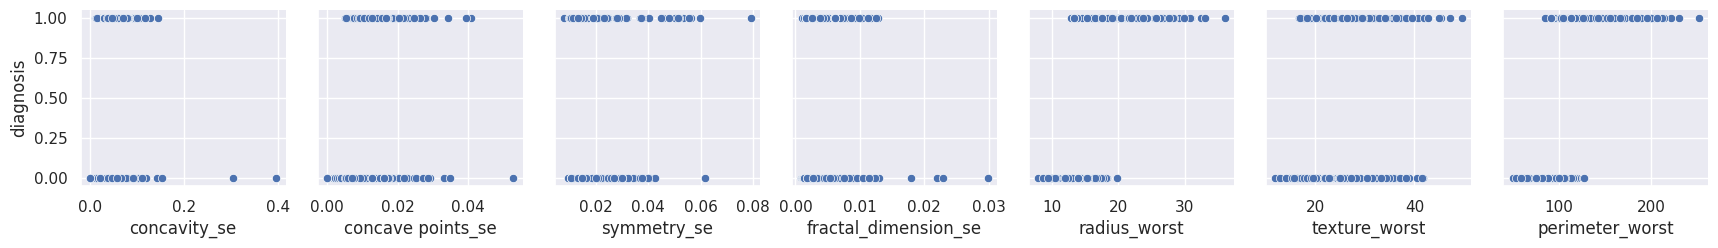

In [17]:
sns.pairplot(data,
             x_vars=[  'concavity_se', 
                     'concave points_se',
                     'symmetry_se',
                     'fractal_dimension_se',
                     'radius_worst', 
                     'texture_worst',
                  'perimeter_worst'],
             y_vars=["diagnosis"])

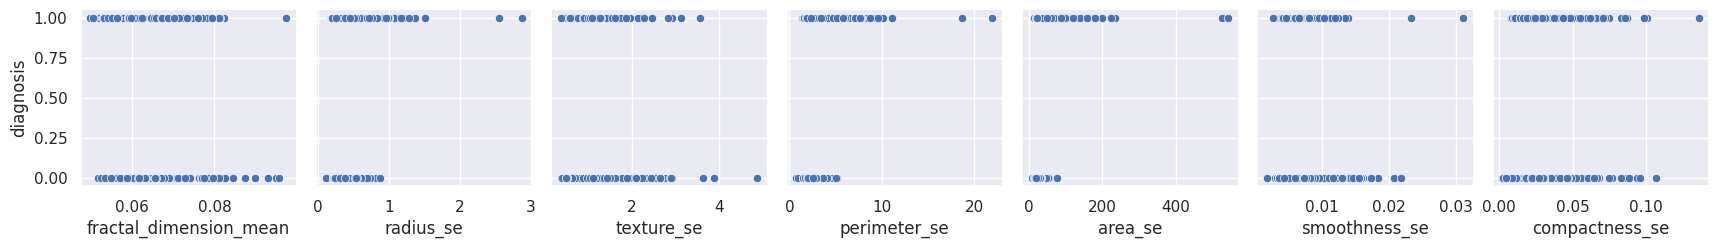

In [18]:
sns.pairplot(data,
             x_vars=[
                     'fractal_dimension_mean',
                       'radius_se', 
                     'texture_se', 
                     'perimeter_se',
                     'area_se',
                     'smoothness_se',
                    'compactness_se'],
                y_vars=["diagnosis"])

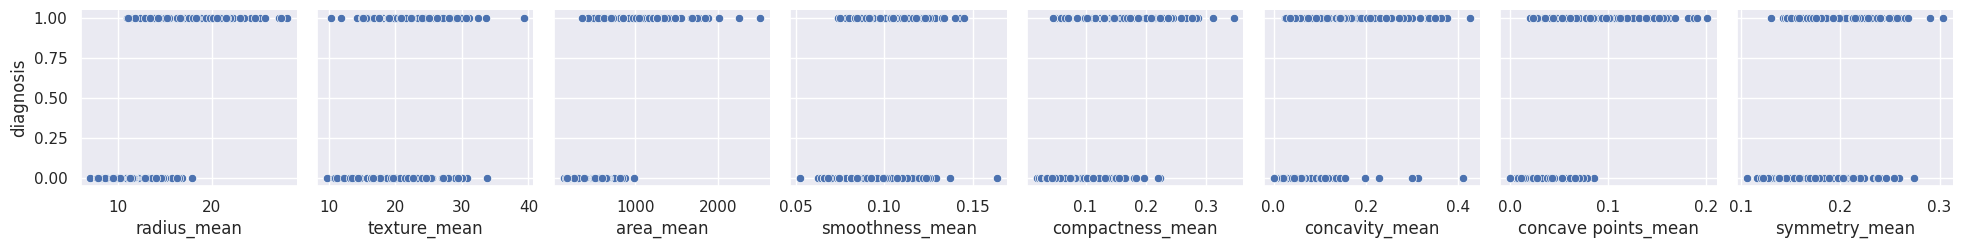

In [19]:
sns.pairplot(data,
             x_vars=['radius_mean', 
                           'texture_mean', 
                              'area_mean', 
                     'smoothness_mean',
                     'compactness_mean', 
                     'concavity_mean',
                  'concave points_mean',
                     'symmetry_mean'],
                      y_vars=["diagnosis"])

# Above graph doesn't tell much about the diagnosis

In [20]:
c={"Agg_of_all":(data["radius_mean"]+data["texture_mean"]+data["perimeter_mean"]+data["area_mean"]+data["smoothness_mean"]+data["compactness_mean"]+
                data["concavity_mean"]+data["concave points_mean"]+data["symmetry_mean"]+data["fractal_dimension_mean"]+data["radius_se"]+data["texture_se"]+
                data["perimeter_se"]+data["area_se"]+data["smoothness_se"]+data["compactness_se"]+data["concavity_se"]+data["concave points_se"]+
                data["fractal_dimension_se"]+data["symmetry_se"]+data["radius_worst"]+data["texture_worst"]+data["perimeter_worst"]+data["area_worst"]+
                data["smoothness_worst"]+data["compactness_worst"]+data["concavity_worst"]+data["concave points_worst"]+data["symmetry_worst"]+data["fractal_dimension_worst"]),"diagnosis":data["diagnosis"]}
data_1 = pd.DataFrame(data=c)

In [21]:
data_1.head()

,Agg_of_all,diagnosis
0,3566.178472,1
1,3740.923467,1
2,3387.392551,1
3,1240.001848,1
4,3336.684215,1


# Feature Engineering:Normalizing the Data

In [22]:
data_1["Agg_of_all"]=(data_1["Agg_of_all"]-data_1["Agg_of_all"].min())/(data_1["Agg_of_all"].max()-data_1["Agg_of_all"].min())

In [23]:
data_1.head()

,Agg_of_all,diagnosis
0,0.416536,1
1,0.440160,1
2,0.392366,1
3,0.102058,1
4,0.385510,1


<Axes: xlabel='Agg_of_all', ylabel='diagnosis'>

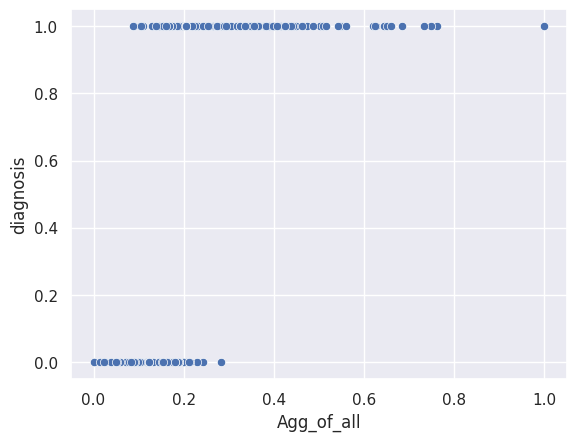

In [24]:
sns.scatterplot(data = data_1, x="Agg_of_all",y="diagnosis",legend='auto')

# So the agg_of_all above 0.2 are generally Cancer with Malignancy

In [25]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
def claculate_vif(dataset):
    vif=pd.DataFrame()
    vif_features = dataset.columns
    vif["vif_values"] = [variance_inflation_factor(dataset.values,i) for i in range (dataset.shape[1])]
    return vif

In [28]:
features = data[['radius_mean', 'texture_mean', 
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
claculate_vif(features)

,vif_values
0,7556.009843
1,250.766688
2,1281.013160
3,387.169455
4,115.036662
5,147.434285
6,154.239026
7,184.296547
8,606.487835
9,229.343950


In [29]:
X=data[['radius_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y=data["diagnosis"]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=500)

In [31]:
#scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, classifier.predict(X_test)))

0.9941520467836257


In [36]:
print(confusion_matrix(Y_test, y_pred))

[[114   1]
 [  0  56]]


In [37]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.98      1.00      0.99        56

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171



In [38]:
#KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors =5, metric="minkowski",p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[113   2]
 [  1  55]]


In [42]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       115
           1       0.96      0.98      0.97        56

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [43]:
#SVM

In [44]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,Y_train)

SVC()

In [45]:
y_pred_svc = svc_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, y_pred_svc))

0.9824561403508771


In [47]:
print(confusion_matrix(Y_test, y_pred_svc))

[[112   3]
 [  0  56]]


In [48]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       115
           1       0.96      0.98      0.97        56

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [49]:
#Model Improvement using gridsearchcv library

In [50]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}

In [51]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,Y_train)
grid.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.861 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [52]:
grid_predict = grid.predict(X_test)

In [56]:
grid_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, grid_predict))

0.9941520467836257


In [54]:
print(confusion_matrix(Y_test, y_pred_svc))

[[112   3]
 [  0  56]]


In [55]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       115
           1       0.96      0.98      0.97        56

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [57]:
%time
questions = ['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
        'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
answers = []
print("Please enter the following details: ")
for i in questions:
    print(i, ": ", end="")
    temp = float(input())
    answers.append(temp)

report = {}

for key in questions:
    for value in answers:
        report[key] = value
        answers.remove(value)
        break

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 32.9 µs
Please enter the following details: 
radius_mean : 

 17.99


perimeter_mean : 

 122.8


area_mean : 

 1001


smoothness_mean : 

 0.1184


compactness_mean : 

 0.2776


concavity_mean : 

 0.3001


concave points_mean : 

 0.1417


symmetry_mean : 

 0.2419


fractal_dimension_mean : 

 0.07481


radius_se : 

 1.095


texture_se : 

 0.9053


perimeter_se : 

 8.589


area_se : 

 153.4


smoothness_se : 

 0.006399


compactness_se : 

 0.04904


concavity_se : 

 0.05373


concave points_se : 

 0.01587


symmetry_se : 

 0.03003


fractal_dimension_se : 

 0.006193


radius_worst : 

 25.38


texture_worst : 

 17.33


perimeter_worst : 

 184.6


area_worst : 

 2019


smoothness_worst : 

 0.1622


compactness_worst : 

 0.0665


concavity_worst : 

 0.7119


concave points_worst : 

 0.2654


symmetry_worst : 

 0.401


fractal_dimension_worst : 

 0.1189


In [60]:
# Convert dictionary(report) to DataFrame(patient_df)
patient_df = pd.DataFrame([report])

# Make a prediction
prediction = grid.predict(patient_df)

# Display the result
if prediction[0] == "M":
    print("Breast cancer detected.")
else:
    print("Breat cancer not detected.")

Breat cancer not detected.


/home/ubc4b8d84492c651399ae4a0f06b960f/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [62]:
from joblib import dump
dump(grid, 'breast-cancer-prediction.joblib')

['breast-cancer-prediction.joblib']

In [64]:
#terminated